In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dataset:  glass.csv

Source: Vina Spiehler, Ph.D., DABFT Diagnostic Products Corporation

Description: Research conducted to test the rule-based system BEAGLE to determine whether a glass was a type of "float" glass or not. 6 types of glass are defined in terms of their oxide content. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence, but only if it is correctly identified!

Variables/Columns

- rI: refractive index
- na: Sodium 
- mg: Magnesium
- al: Aluminum
- si: Silicon
- k: Potassium
- ca: Calcium
- ba: Barium
- fe: Iron
- glass: (class attribute)
    - 1: building_windows_float_processed
    - 2: building_windows_non_float_processed
    - 3: vehicle_windows_float_processed
    - 4: vehicle_windows_non_float_processed (none in this database)
    - 5: containers
    - 6: tableware
    - 7: headlamps

In [2]:
# Load data
glass_dataset = "https://static.bc-edx.com/ai/ail-v-1-0/m13/lesson_2/datasets/glass.csv"
df = pd.read_csv(glass_dataset)
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# Define features set
X = df.drop("glass", axis=1)
X.head()

,ri,na,mg,al,si,k,ca,ba,fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [4]:
# Define target vector
y = df["glass"].values

In [5]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

StandardScaler()

In [7]:
# Transform the training and testing data by using the X_scaler model
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.722
k: 3, Train/Test Score: 0.838/0.704
k: 5, Train/Test Score: 0.781/0.704
k: 7, Train/Test Score: 0.719/0.704
k: 9, Train/Test Score: 0.688/0.722
k: 11, Train/Test Score: 0.662/0.722
k: 13, Train/Test Score: 0.681/0.704
k: 15, Train/Test Score: 0.650/0.685
k: 17, Train/Test Score: 0.656/0.722
k: 19, Train/Test Score: 0.631/0.704


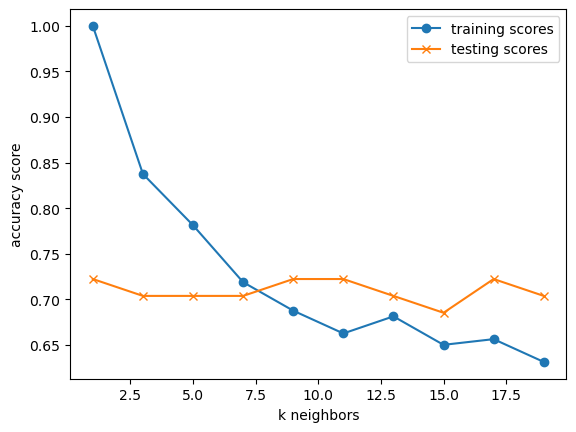

In [8]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [9]:
# Train the KNN model with the best k value
# Note that k: 9 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.722
